In [1]:
# Import Fashion-MNIST dataset from 'fashion' folder

from fashion import mnist_reader
X_train, y_train = mnist_reader.load_mnist('fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion', kind='t10k')

In [2]:
# Data exploration

print("Inputs shape is " + str(X_train.shape)) # 60,000 flattened image vectors (784 pixels long)
print("Input type is " + str(type(X_train)))
print("Labels:")
print(y_train)
print("Labels shape is" + str(y_train.shape)) # 60,000 labels
print("Labels type is " + str(type(y_train)))

Inputs shape is (60000, 784)
Input type is <class 'numpy.ndarray'>
Labels:
[9 0 0 ..., 3 0 5]
Labels shape is(60000,)
Labels type is <class 'numpy.ndarray'>


In [3]:
# Convert numerical label to item description

def to_description(label):
    if label == 0: return "T-shirt/top"
    elif label == 1: return "Trouser"
    elif label == 2: return "Pullover"
    elif label == 3: return "Dress"
    elif label == 4: return "Coat"
    elif label == 5: return "Sandal"
    elif label == 6: return "Shirt"
    elif label == 7: return "Sneaker"
    elif label == 8: return "Bag"
    elif label == 9: return "Ankle boot"
    else: return "Label not found"

Label:  9
Description:  Ankle boot


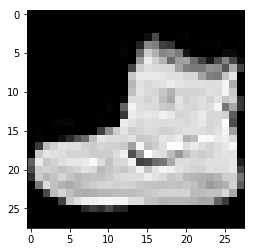

In [4]:
# Visualize the training examples

import matplotlib.pyplot as plt
import numpy as np

def visualize_sample(sample_num):
    flattened_vector = X_train[sample_num] # retrieve flattened vector
    image_2d = np.reshape(flattened_vector, (28, 28)) # reshape to 28 x 28 grayscale image array
    plt.imshow(image_2d, cmap = plt.get_cmap('gray')) # feed image into matplotlib
    print("Label: ", y_train[sample_num]) # print actual label
    print("Description: ", to_description(y_train[sample_num])) # print description
    plt.show()
    
    
visualize_sample(0)

In [5]:
# Normalize pixel values to between 0-1
X_train = X_train / 255.
X_test = X_test / 255.

In [6]:
#Use Keras to categorize the outputs ("one-hot" vectors)

import keras
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10)


Using TensorFlow backend.


In [7]:
from keras.layers import Dense, Activation
from keras.models import Sequential

model = Sequential()

model.add(Dense(units=400, input_dim = 784))
model.add(Activation('relu'))

model.add(Dense(units=200))
model.add(Activation('relu'))

model.add(Dense(units=100))
model.add(Activation('relu'))

model.add(Dense(units=10))
model.add(Activation('softmax')) #using softmax to output probabilities adding to 1

In [8]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [9]:
model.summary() #print model summary

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
activation_1 (Activation)    (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
__________

In [10]:
# Import relevant libraries
from keras_tqdm import TQDMNotebookCallback # TQDM: progress bars
from keras.callbacks import TensorBoard # Tensorboard: training plots
    
# Clear any existing Tensorboard logs
import shutil
shutil.rmtree('./logs', ignore_errors=True)

# Set up callback links to refer back to during training
tensorboard = TensorBoard()
callbacks_list = [TQDMNotebookCallback(), tensorboard]

In [11]:
# Fit model to training data
# Reserve some fraction of training data as validation data
# Pick number of epochs
# Pick a batch_size
# Pass in relevant callbacks
    
model.fit(X_train, y_train_categorical, 
         epochs=20, 
         batch_size=35,
         validation_split = 0.1,
         verbose = 0,
         callbacks = callbacks_list)

HBox(children=(IntProgress(value=0, description='Training', max=20), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 1', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 2', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 4', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 5', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 6', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 7', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 8', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 9', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 10', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 11', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 12', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 13', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 14', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 15', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 16', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 17', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 18', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 19', max=54000), HTML(value='')))

In [12]:
# Evaluate model on test data

loss_and_metrics = model.evaluate(X_test, y_test_categorical, batch_size=128)
print(loss_and_metrics)

 9088/10000 [==========================>...] - ETA: 0s[0.33222102551460264, 0.88229999999999997]


In [13]:
# Final predictions testing

import numpy as np

# Compare actual class to predicted class
def visualize_test_sample(test_sample_num):
    
    # Display actual image & label
    flattened_vector = X_test[test_sample_num] # retrieve flattened vector
    image_2d = np.reshape(flattened_vector, (28, 28)) # reshape to 28 x 28 grayscale image array
    plt.imshow(image_2d, cmap = plt.get_cmap('gray')) # feed image into matplotlib
    print("Actual Label: ", y_test[test_sample_num]) # print actual label
    print("Actual Description: ", to_description(y_test[test_sample_num])) # print description
    plt.show()
    
    # Print predicted label
    test_sample = np.expand_dims(X_test[test_sample_num], axis=0) # pick out a one-sample "batch" to feed into model
    predicted_scores = model.predict(test_sample) # outputted probabilities vector
    print("Outputted scores: ", predicted_scores) # print predicted scores

    predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
    print("Predicted Label: ", predicted_class) # print predicted classification
    print("Predicted Description: ", to_description(predicted_class)) # print predicted label description

Actual Label:  2
Actual Description:  Pullover


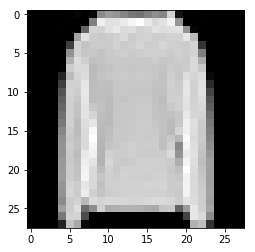

Outputted scores:  [[  1.20049714e-04   3.59644619e-05   8.40992570e-01   1.87396741e-04
    1.38231099e-01   4.80189166e-10   2.04189084e-02   8.36098124e-09
    1.39453005e-05   5.86572533e-08]]
Predicted Label:  2
Predicted Description:  Pullover


In [14]:
visualize_test_sample(2109)